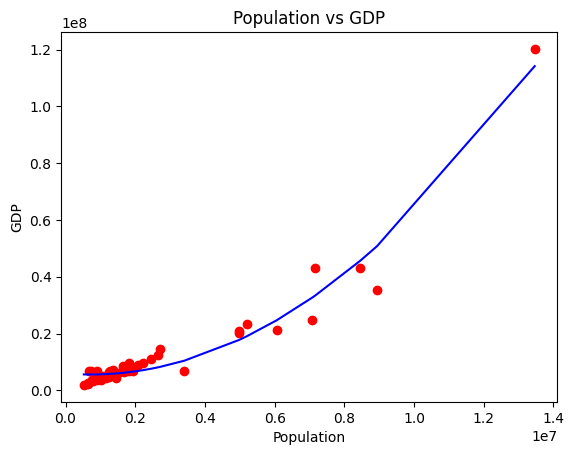

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dt = pd.read_csv('pref_population_gdp.csv')
X = dt.iloc[:, 1:-1].values
y = dt.iloc[:, -1].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()
#reshape(行数(-1だと自動で決められる),(列数（割り切れないとエラー）))

#データセットを使った多項式回帰モデルの訓練
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
#X を曲線用データに変換
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
X_poly_pred = poly_reg.transform(X)
#lin_reg「曲線の形を学習して予測するAI」
#「曲線を作るのは X（説明変数）だけで十分」だからyは変換しない。X を x, x², x³… に増やして、
#その組み合わせで y を説明する方法
lin_reg.fit(X_poly, y)

#結果の可視化（多項式回帰）
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X_poly_pred), color='blue')
#→ X を「多項式データ（曲線が作れる形）」に変換する（x, x², x³, x⁴ などにする）
#lin_reg_2.predict(...)
#→その曲線データを使って y の予測値 を計算する
#plt.plot(X, 予測されたy)
#→ 予測された値を 青い曲線 としてグラフに描く

#X_polyでなく、X_poly_predを使う理由➡fit_transformを
# plot や predict に使うと同じデータで再学習してしまうから
plt.title('Population vs GDP')
plt.xlabel('Population')
plt.ylabel('GDP')
plt.show()


Polynomial Regression Analysis.ipynb

（多項式回帰分析の学習まとめ）

🎯 学習目的

本分析は 多項式回帰（Polynomial Regression） を理解し、単回帰よりも柔軟なモデルで人口からGDPを予測する方法を学ぶことを目的として作成しました。

一次関数（直線）では表しきれない非線形な関係を捉えるため、
人口とGDPの関係を「曲線」でモデル化する方法を実装・可視化しました。

💡 分析内容
使用データ

47都道府県の人口とGDPデータ

pref_population_gdp.csv

モデル

多項式回帰（PolynomialFeatures + LinearRegression）

degree = 2（2次曲線）

手順

数値データの読み込み

欠損値を中央値で補完

PolynomialFeatures を使って人口データ（X）を 2 次式に変換

多項式回帰モデル（LinearRegression）を学習

実測値（散布図）と予測曲線（青線）をプロットして比較

📊 結果と考察

可視化の結果、単回帰（直線）よりも
多項式回帰の方がデータの曲がり方にフィットしていることが確認できました。

特に、

人口が中程度～多い地域で GDP が急激に伸びる

小規模自治体のデータが密集しており、直線では表現しにくい

といった特徴が、多項式（曲線）を使うことでより自然に捉えられています。

しかし同時に、

多くのデータ点が曲線から大きく外れる

東京など特異点（例外的にGDPが大きい地域）が存在する

人口以外にも経済規模を左右する要因（産業構造・企業数・都市機能など）が重要

という点も明らかになりました。

👉 結論

多項式回帰を使うことで、
「人口が増えるほどGDPが伸びる」という非線形な傾向はより捉えられたが、GDP は人口だけでは十分に説明できないということを強く実感しました。

📝 感想

今回の多項式回帰の実装を通して、単回帰よりも複雑な関係性を扱える点が非常に面白く感じられました。

一方で、人口だけからGDPを予測することの限界も明確に見え、「モデルの精度を高めるためにはデータの質・種類が重要」という機械学習の基本を学ぶ良い機会になりました。